In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from utils import (
    ESP32CSIMultiTaskModel,
    train_esp32_multitask_model,
    plot_training_results,
    visualize_predictions,
    preprocess_esp32_csi,
    run_predictions
)

In [2]:
filename = "cleaned_merged_labelled_dataset.csv"

In [3]:
df = pd.read_csv(filename)
print("DataFrame head:")
print(df.head())

DataFrame head:
                                            CSI_DATA  locationX  locationY  \
0  [28 -64 1 0 0 0 0 0 0 0 0 0 -7 -11 -7 -12 -7 -...          0          0   
1  [-99 -48 9 0 0 0 0 0 0 0 0 0 13 -20 14 -20 15 ...          0          0   
2  [-121 112 8 0 0 0 0 0 0 0 0 0 -21 -14 -20 -14 ...          0          0   
3  [-122 -31 23 0 0 0 0 0 0 0 0 0 12 -10 13 -10 1...          0          0   
4  [-122 -31 23 0 0 0 0 0 0 0 0 0 -2 17 -3 18 -3 ...          0          0   

   state  
0      0  
1      0  
2      0  
3      0  
4      0  


In [4]:
# train model
model, history = train_esp32_multitask_model(
    csv_file=filename,
    input_shape=(128, 50),  # 128 subcarriers, 50 samples per window
    epochs=25,
    batch_size=16
)

Epoch 1/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - location_location_mae: 1.3233 - location_loss: 4.2349 - loss: 3.1561 - presence_accuracy: 0.5051 - presence_loss: 1.0386 - val_location_location_mae: 0.9993 - val_location_loss: 1.5703 - val_loss: 1.5372 - val_presence_accuracy: 0.5078 - val_presence_loss: 0.7671 - learning_rate: 5.0000e-04
Epoch 2/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - location_location_mae: nan - location_loss: nan - loss: nan - presence_accuracy: 0.5895 - presence_loss: 0.7486 - val_location_location_mae: 0.9757 - val_location_loss: 1.3667 - val_loss: 2.0176 - val_presence_accuracy: 0.4570 - val_presence_loss: 1.3240 - learning_rate: 5.0000e-04
Epoch 3/25
178/178 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - location_location_mae: 0.7781 - location_loss: 0.9476 - loss: 1.2433 - presence_accuracy: 0.6126 - presence_loss: 0.7695 - val_location_location_mae: 0.9011 - val_location_loss: 1.1904 - val_loss: 1.4441 - val_presence_accuracy: 0.5458 - val_presence_loss: 0.8

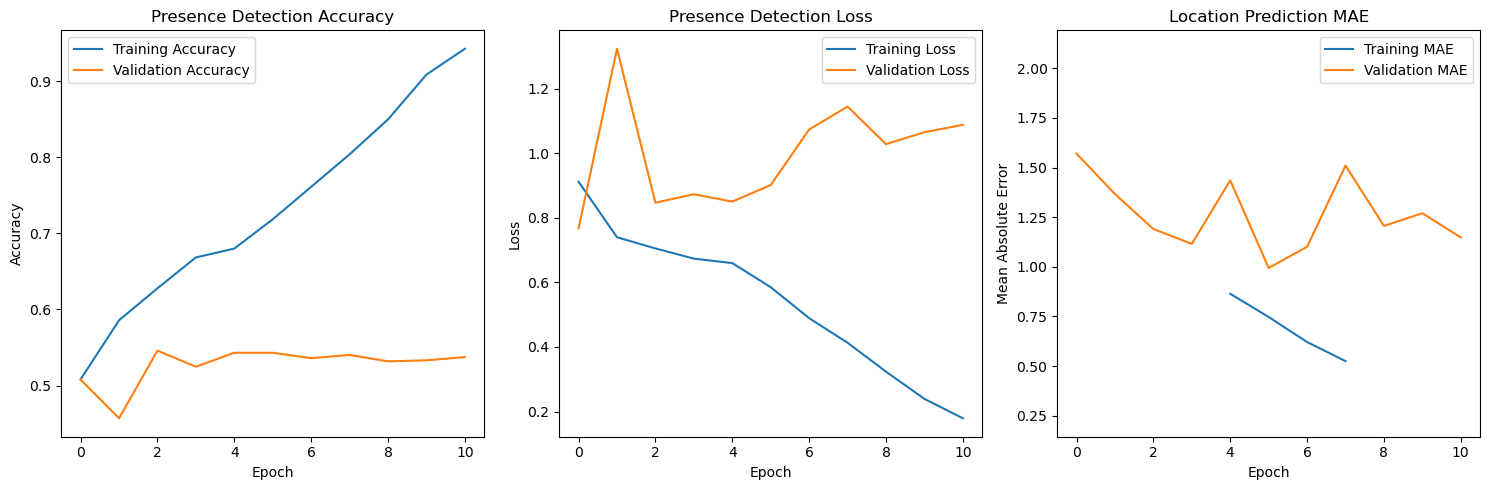

In [5]:
# visualize data
plot_training_results(history)

In [6]:
# SAVE WEIGHTS
model.model.save('weights/weights_v9.h5')

In [7]:
metrics = run_predictions('weights/weights_v9.h5', 'cleaned_merged_labelled_dataset.csv')

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Detailed results for first 5 samples:

Sample 1:
Presence: True=0, Predicted=1

Sample 2:
Presence: True=0, Predicted=0

Sample 3:
Presence: True=0, Predicted=0

Sample 4:
Presence: True=0, Predicted=0

Sample 5:
Presence: True=0, Predicted=0

Overall Metrics:
Presence Detection Accuracy: 0.79
Location Mean Absolute Error: 0.57
Number of samples evaluated: 3543


In [ ]:
# RUN THIS TO RUN MODEL WEIGHTS
